In [41]:
# ignore wartnings
import warnings
warnings.filterwarnings("ignore")

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
# Load datasets
movies_df = pd.read_csv("movies.csv")
ratings_df = pd.read_csv("ratings.csv")

In [ ]:
# Display basic info of movies
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [ ]:
# Display basic info of ratings
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [6]:
# Display the first 5 rows of the movies dataframe
movies_df.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
# Display the first 5 rows of the ratings dataframe
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


### Genre Distribution

In [16]:
# Display the number of unique genres in the movies dataframe
genres = movies_df['genres'].str.split('|')
genres

0        [Adventure, Animation, Children, Comedy, Fantasy]
1                           [Adventure, Children, Fantasy]
2                                        [Comedy, Romance]
3                                 [Comedy, Drama, Romance]
4                                                 [Comedy]
                               ...                        
10324                        [Animation, Children, Comedy]
10325                                             [Comedy]
10326                                             [Comedy]
10327                                              [Drama]
10328                                 [(no genres listed)]
Name: genres, Length: 10329, dtype: object

In [42]:
# Extract unique genres
all_genres = [genre for sublist in movies_df['genres'].str.split('|') for genre in sublist]

all_genres

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Adventure',
 'Children',
 'Fantasy',
 'Comedy',
 'Romance',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Action',
 'Crime',
 'Thriller',
 'Comedy',
 'Romance',
 'Adventure',
 'Children',
 'Action',
 'Action',
 'Adventure',
 'Thriller',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Horror',
 'Adventure',
 'Animation',
 'Children',
 'Drama',
 'Action',
 'Adventure',
 'Romance',
 'Crime',
 'Drama',
 'Drama',
 'Romance',
 'Comedy',
 'Comedy',
 'Action',
 'Comedy',
 'Crime',
 'Drama',
 'Thriller',
 'Comedy',
 'Crime',
 'Thriller',
 'Crime',
 'Drama',
 'Horror',
 'Mystery',
 'Thriller',
 'Action',
 'Crime',
 'Thriller',
 'Drama',
 'Sci-Fi',
 'Drama',
 'Romance',
 'Drama',
 'Children',
 'Drama',
 'Drama',
 'Romance',
 'Adventure',
 'Drama',
 'Fantasy',
 'Mystery',
 'Sci-Fi',
 'Crime',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Thriller',
 'Adventure',
 'Romance',
 'IMAX',
 'Children',
 'Drama',
 'Drama',
 'Romance',
 'Crime'

In [26]:
genre_counts = Counter(all_genres)
genre_counts

Counter({'Drama': 5220,
         'Comedy': 3515,
         'Thriller': 2187,
         'Romance': 1788,
         'Action': 1737,
         'Crime': 1440,
         'Adventure': 1164,
         'Horror': 1001,
         'Sci-Fi': 860,
         'Mystery': 675,
         'Fantasy': 670,
         'Children': 540,
         'War': 503,
         'Documentary': 415,
         'Musical': 409,
         'Animation': 401,
         'Western': 235,
         'Film-Noir': 195,
         'IMAX': 152,
         '(no genres listed)': 7})

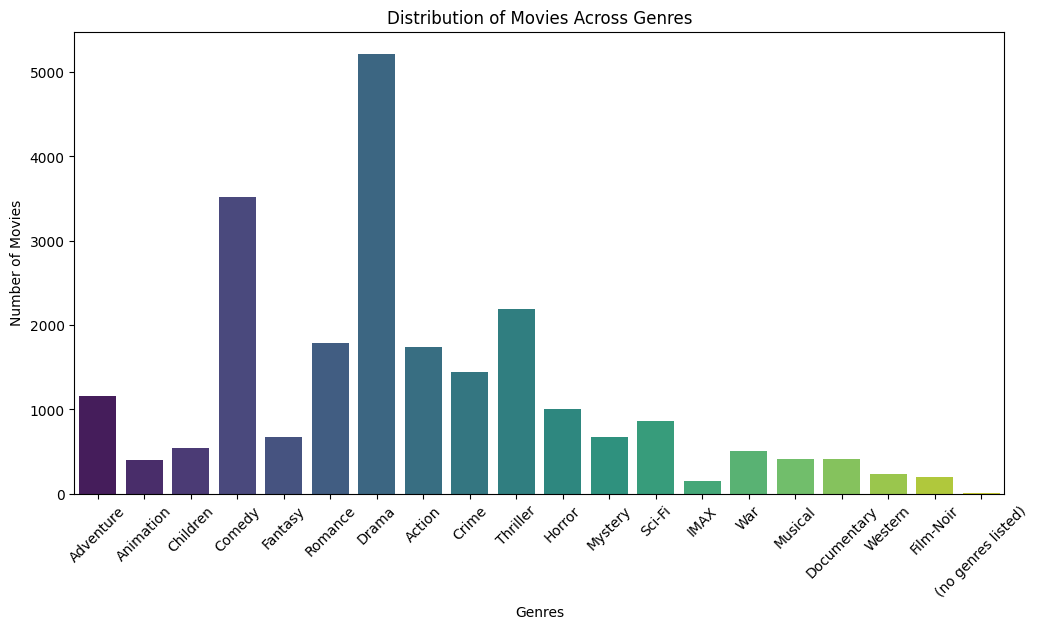

In [43]:
# Plot genre distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()), palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Genres")
plt.ylabel("Number of Movies")
plt.title("Distribution of Movies Across Genres")
plt.show()

### Ratings Distribution

In [36]:
ratings_df['rating']
rating_counts = Counter(ratings_df['rating'])
rating_counts

Counter({4.0: 28880,
         3.0: 21729,
         5.0: 14856,
         3.5: 12237,
         4.5: 8187,
         2.0: 7943,
         2.5: 5484,
         1.0: 3258,
         1.5: 1567,
         0.5: 1198})

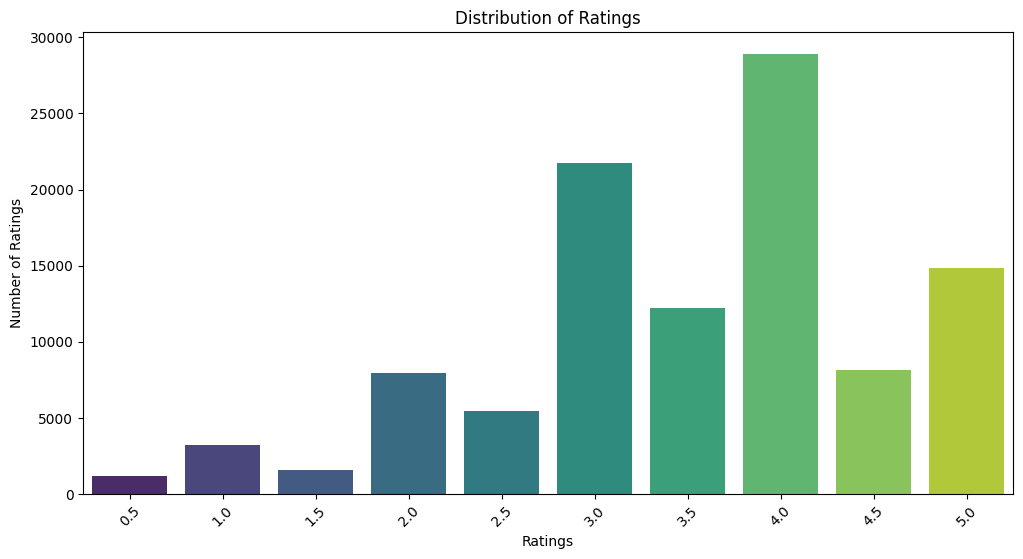

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(x=list(rating_counts.keys()), y=list(rating_counts.values()), palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Ratings")
plt.ylabel("Number of Ratings")
plt.title("Distribution of Ratings")
plt.show()

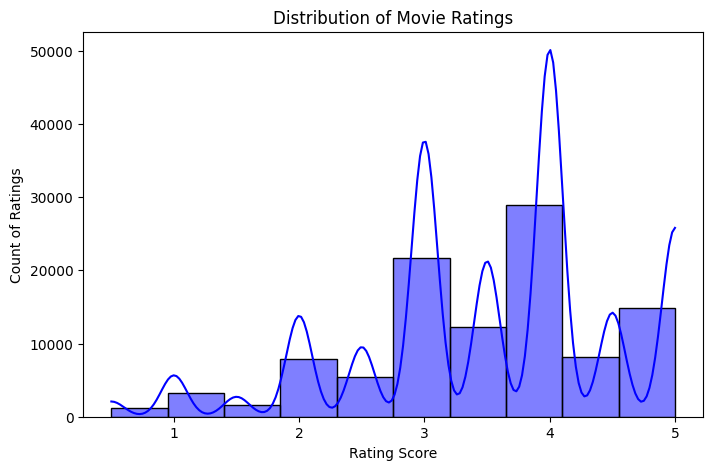

In [ ]:
# histogram plot of the number of ratings per movie
plt.figure(figsize=(8, 5))
sns.histplot(ratings_df['rating'], bins=10, kde=True, color='blue')
plt.xlabel("Rating Score")
plt.ylabel("Count of Ratings")
plt.title("Distribution of Movie Ratings")
plt.show()

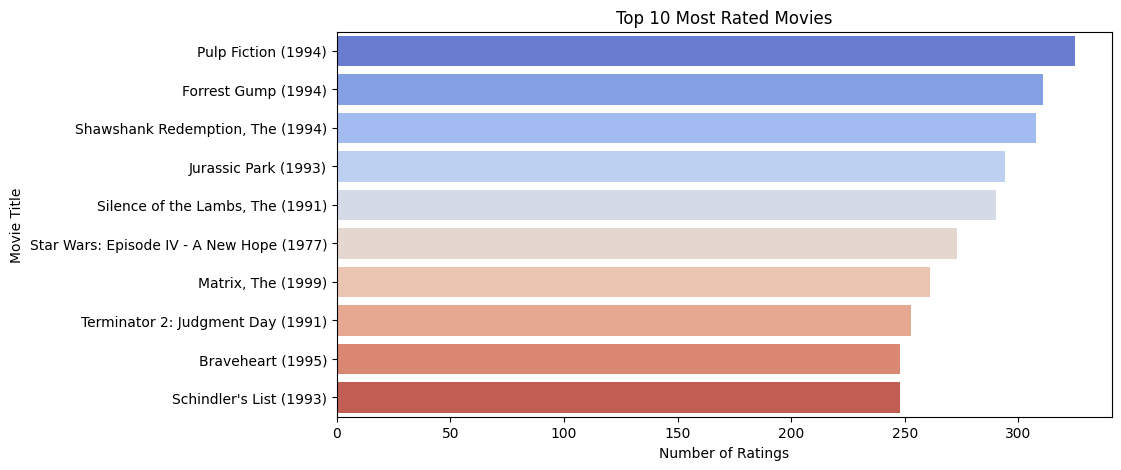

In [46]:
# Top 10 most rated movies
top_movies = ratings_df.groupby('movieId').count()['rating'].sort_values(ascending=False).head(10)
top_movies = top_movies.reset_index().merge(movies_df, on="movieId")

plt.figure(figsize=(10, 5))
sns.barplot(y=top_movies['title'], x=top_movies['rating'], palette="coolwarm")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Title")
plt.title("Top 10 Most Rated Movies")
plt.show()

### Highest Rated Movies (Min. 100 Ratings

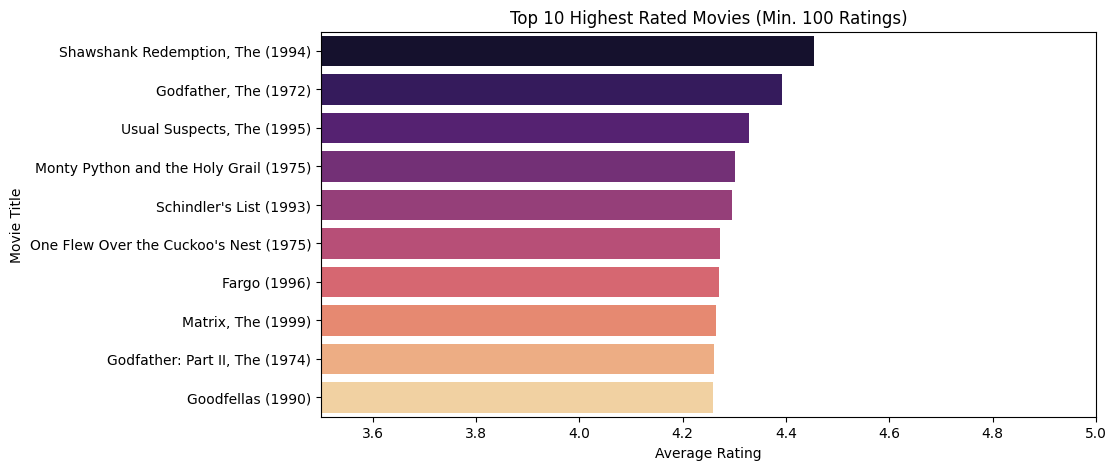

In [47]:
# Average ratings per movie (Top 10 highest-rated movies with >100 ratings)
avg_ratings = ratings_df.groupby('movieId').agg({'rating': 'mean', 'userId': 'count'})
avg_ratings = avg_ratings[avg_ratings['userId'] > 100].sort_values(by='rating', ascending=False).head(10)
avg_ratings = avg_ratings.reset_index().merge(movies_df, on="movieId")

plt.figure(figsize=(10, 5))
sns.barplot(y=avg_ratings['title'], x=avg_ratings['rating'], palette="magma")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.title("Top 10 Highest Rated Movies (Min. 100 Ratings)")
plt.xlim(3.5, 5.0)
plt.show()

### Popularity-Based Recommendation

In [53]:
# function to recommend top-N popular movies based on genre
def popularity_based_recommendation(genre, min_reviews=100, top_n=5):
    """
    Recommends Top-N popular movies based on genre, filtered by minimum review count.

    Parameters:
    genre (str): Genre of movies to filter.
    min_reviews (int): Minimum number of reviews required.
    top_n (int): Number of recommendations.

    Returns:
    DataFrame: Top-N movies matching criteria.
    """
    # Filter movies that belong to the given genre
    genre_movies = movies_df[movies_df['genres'].str.contains(genre, case=False, na=False)]

    # Merge with ratings
    genre_ratings = genre_movies.merge(ratings_df, on="movieId")

    # Aggregate average rating and total count of ratings
    movie_stats = genre_ratings.groupby(['movieId', 'title']).agg(
        avg_rating=('rating', 'mean'),
        num_ratings=('rating', 'count')
    ).reset_index()

    # Apply minimum review filter and sort by average rating
    filtered_movies = movie_stats[movie_stats['num_ratings'] >= min_reviews].sort_values(by="avg_rating", ascending=False)

    # Get top-N movies
    return filtered_movies[['title', 'avg_rating', 'num_ratings']].head(top_n)

# Example usage: Get top 5 Comedy movies with at least 100 ratings
popularity_based_recommendation("Comedy", min_reviews=100, top_n=5)

,title,avg_rating,num_ratings
326,Monty Python and the Holy Grail (1975),4.301948,154
193,Fargo (1996),4.271144,201
337,"Princess Bride, The (1987)",4.163743,171
90,Pulp Fiction (1994),4.160000,325
110,Forrest Gump (1994),4.138264,311


In [54]:
popularity_based_recommendation("Animation", min_reviews=100, top_n=5)

,title,avg_rating,num_ratings
174,"Incredibles, The (2004)",3.926471,102
84,Toy Story 2 (1999),3.913462,104
0,Toy Story (1995),3.907328,232
150,Finding Nemo (2003),3.888889,117
119,"Monsters, Inc. (2001)",3.879310,116


### Content-Based Recommendation System
 - Convert the movie genres into a machine-readable format (like vectors).
 - Calculate similarity scores between movies.
 - Return the Top-N most similar movies to the input movie.

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [57]:
# Convert genres into lowercase text format
movies_df['genres'] = movies_df['genres'].fillna('').str.lower()
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),adventure|animation|children|comedy|fantasy
1,2,Jumanji (1995),adventure|children|fantasy
2,3,Grumpier Old Men (1995),comedy|romance
3,4,Waiting to Exhale (1995),comedy|drama|romance
4,5,Father of the Bride Part II (1995),comedy


In [ ]:
# Convert genres into TF-IDF features
tfidf = TfidfVectorizer(stop_words='english') # Remove common English words, e.g., 'the', 'a', etc.
tfidf_matrix = tfidf.fit_transform(movies_df['genres']) # Fit and transform the genres - TF-IDF matrix

tfidf_matrix.shape


(10329, 23)

In [60]:
tfidf_matrix_df = pd.DataFrame(tfidf_matrix.toarray(), index=movies_df.index, columns=tfidf.get_feature_names_out())
tfidf_matrix_df.head()

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,fi,...,imax,listed,musical,mystery,noir,romance,sci,thriller,war,western
0,0.0,0.404103,0.539216,0.501506,0.263837,0.0,0.0,0.00000,0.474161,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.505272,0.000000,0.627061,0.000000,0.0,0.0,0.00000,0.592869,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.000000,0.602350,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.798232,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.000000,0.541389,0.0,0.0,0.43837,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.717446,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [65]:
# Compute similarity between all movies
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim, index=movies_df['title'], columns=movies_df['title'])
cosine_sim_df.head()

title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Circle (2015),The Measure of a Man (2015),Bone Tomahawk (2015),Elämältä kaiken sain ( ),Creed (2015),Cosmic Scrat-tastrophe (2015),Le Grand Restaurant (1966),A Very Murray Christmas (2015),The Big Short (2015),Marco Polo: One Hundred Eyes (2015)
title,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),1.000000,0.799772,0.158922,0.142838,0.263837,0.0,0.158922,0.644056,0.0,0.260439,...,0.000000,0.00000,0.0,0.205047,0.00000,0.782223,0.263837,0.263837,0.00000,0.0
Jumanji (1995),0.799772,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.805299,0.0,0.325642,...,0.000000,0.00000,0.0,0.000000,0.00000,0.402028,0.000000,0.000000,0.00000,0.0
Grumpier Old Men (1995),0.158922,0.000000,1.000000,0.898795,0.602350,0.0,1.000000,0.000000,0.0,0.000000,...,0.000000,0.00000,0.0,0.468130,0.00000,0.203167,0.602350,0.602350,0.00000,0.0
Waiting to Exhale (1995),0.142838,0.000000,0.898795,1.000000,0.541389,0.0,0.898795,0.000000,0.0,0.000000,...,0.119284,0.43837,0.0,0.696614,0.43837,0.182606,0.541389,0.541389,0.43837,0.0
Father of the Bride Part II (1995),0.263837,0.000000,0.602350,0.541389,1.000000,0.0,0.602350,0.000000,0.0,0.000000,...,0.000000,0.00000,0.0,0.777173,0.00000,0.337291,1.000000,1.000000,0.00000,0.0


In [66]:
# Create a mapping of movie titles to indices
movie_indices = pd.Series(movies_df.index, index=movies_df['title']).drop_duplicates()
movie_indices


title
Toy Story (1995)                           0
Jumanji (1995)                             1
Grumpier Old Men (1995)                    2
Waiting to Exhale (1995)                   3
Father of the Bride Part II (1995)         4
                                       ...  
Cosmic Scrat-tastrophe (2015)          10324
Le Grand Restaurant (1966)             10325
A Very Murray Christmas (2015)         10326
The Big Short (2015)                   10327
Marco Polo: One Hundred Eyes (2015)    10328
Length: 10329, dtype: int64

In [68]:
# function to recommend top-N similar movies based on title
def content_based_recommendation(movie_title, top_n=5):
    """
    Recommends Top-N similar movies based on title.

    Parameters:
    movie_title (str): Title of the input movie.
    top_n (int): Number of recommendations.

    Returns:
    DataFrame: Top-N most similar movies.
    """
    # Get the index of the given movie
    idx = movie_indices.get(movie_title)
    
    if idx is None:
        return "Movie not found! Please check the title."

    # Get similarity scores for all movies
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort by similarity score (highest first)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]

    # Get movie indices of top similar movies
    movie_indices_list = [i[0] for i in sim_scores]

    # Return the top N similar movies
    return movies_df.iloc[movie_indices_list][['title', 'genres']]

# Example usage: Get movies similar to "Toy Story (1995)"
content_based_recommendation("Toy Story (1995)", top_n=5)

,title,genres
1815,Antz (1998),adventure|animation|children|comedy|fantasy
2496,Toy Story 2 (1999),adventure|animation|children|comedy|fantasy
2967,"Adventures of Rocky and Bullwinkle, The (2000)",adventure|animation|children|comedy|fantasy
3166,"Emperor's New Groove, The (2000)",adventure|animation|children|comedy|fantasy
3811,"Monsters, Inc. (2001)",adventure|animation|children|comedy|fantasy


In [72]:
movie_indices

title
Toy Story (1995)                           0
Jumanji (1995)                             1
Grumpier Old Men (1995)                    2
Waiting to Exhale (1995)                   3
Father of the Bride Part II (1995)         4
                                       ...  
Cosmic Scrat-tastrophe (2015)          10324
Le Grand Restaurant (1966)             10325
A Very Murray Christmas (2015)         10326
The Big Short (2015)                   10327
Marco Polo: One Hundred Eyes (2015)    10328
Length: 10329, dtype: int64

In [75]:

content_based_recommendation("Marco Polo: One Hundred Eyes (2015)", top_n=5)

,title,genres
10260,Pablo (2012),(no genres listed)
10280,The Big Broadcast of 1936 (1935),(no genres listed)
10301,Round Trip to Heaven (1992),(no genres listed)
10303,The 50 Year Argument (2014),(no genres listed)
10317,The Take (2009),(no genres listed)


In [84]:
# filter the movie title from the dataset
movie_name = 'Marco Polo: One Hundred Eyes (2015)'
result = movies_df[movies_df['title'] == movie_name]

result

,movieId,title,genres
10328,149532,Marco Polo: One Hundred Eyes (2015),(no genres listed)


In [ ]:
def check_similarity(movie_title, top_n=5):
    idx = movie_indices.get(movie_title)
    if idx is None:
        return "Movie not found!"
    
    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort and display Top-10 similar movies
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]

    # Show movie titles with similarity scores
    similar_movies = [(movies_df.iloc[i[0]]['title'], i[1]) for i in sim_scores]
    return pd.DataFrame(similar_movies, columns=['Movie', 'Similarity Score'])

In [88]:
# Example usage: Check similarity scores for "Toy Story (1995)"
check_similarity("The Take (2009)", 20)

,Movie,Similarity Score
0,Pablo (2012),1.0
1,The Big Broadcast of 1936 (1935),1.0
2,Round Trip to Heaven (1992),1.0
3,The 50 Year Argument (2014),1.0
4,The Take (2009),1.0
5,Marco Polo: One Hundred Eyes (2015),1.0
6,Toy Story (1995),0.0
7,Jumanji (1995),0.0
8,Grumpier Old Men (1995),0.0
9,Waiting to Exhale (1995),0.0


In [90]:
# Visualize Cosine Similarity as Heatmap

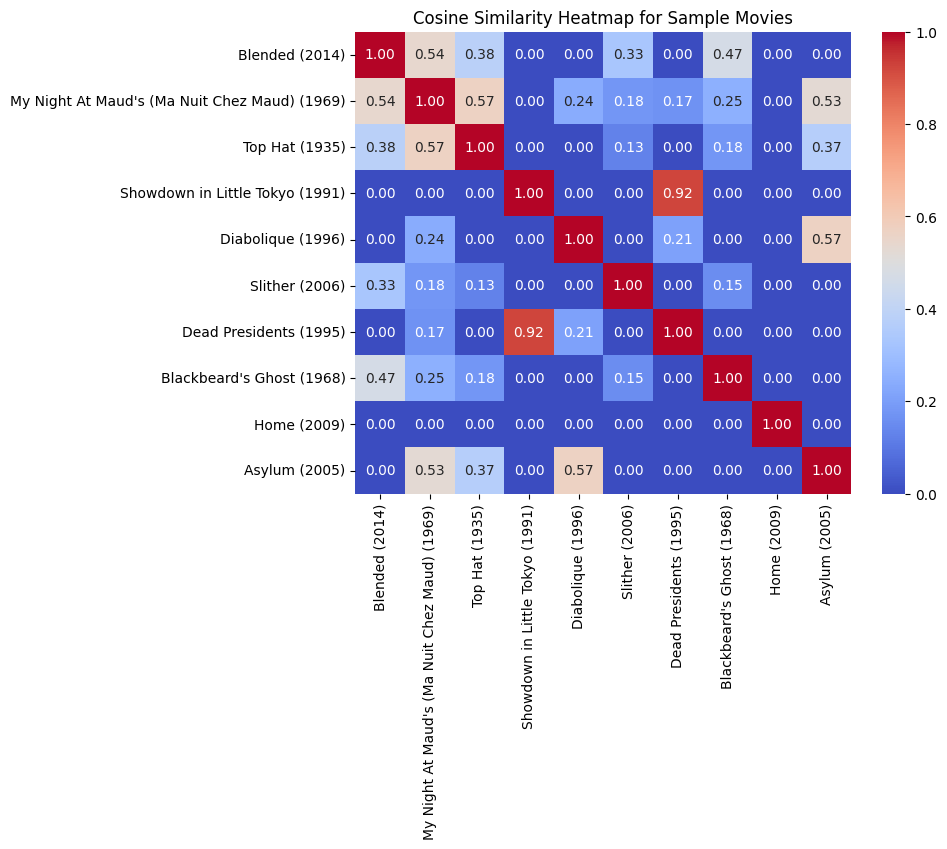

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of movies for visualization
sample_movies = movie_indices.sample(10, random_state=42).index # Randomly sample 10 movies
sample_indices = [movie_indices.get(movie) for movie in sample_movies]

# Extract similarity matrix for these movies
sim_matrix = cosine_sim[sample_indices, :][:, sample_indices]

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(sim_matrix, annot=True, xticklabels=sample_movies, yticklabels=sample_movies, cmap="coolwarm", fmt=".2f")
plt.title("Cosine Similarity Heatmap for Sample Movies")
plt.show()

### Collaborative Filtering (User-Based)

In [96]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [103]:
# Create User-Movie Ratings Matrix
user_movie_matrix = ratings_df.pivot_table(index='userId', columns='movieId', values='rating')

# Compute Similarity Between Users (Cosine Similarity)
user_similarity = cosine_similarity(user_movie_matrix.fillna(0))

# Convert similarity matrix to DataFrame
user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)

user_similarity_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.101113,0.210044,0.128766,0.057896,0.077130,0.358090,0.097434,0.239189,0.026663,...,0.291162,0.144741,0.106583,0.091049,0.236805,0.154519,0.245071,0.238660,0.278217,0.153479
2,0.101113,1.000000,0.115559,0.034610,0.032705,0.028305,0.062914,0.471918,0.194232,0.000000,...,0.068325,0.000000,0.477330,0.146887,0.163553,0.061737,0.050948,0.051423,0.035907,0.064816
3,0.210044,0.115559,1.000000,0.058208,0.044426,0.012816,0.084522,0.066620,0.459703,0.068454,...,0.152078,0.301021,0.081626,0.098949,0.310234,0.079452,0.092821,0.080940,0.158943,0.109648
4,0.128766,0.034610,0.058208,1.000000,0.019298,0.005781,0.059089,0.024420,0.050572,0.000000,...,0.055860,0.024329,0.040467,0.108881,0.076241,0.014011,0.042643,0.174275,0.061677,0.157794
5,0.057896,0.032705,0.044426,0.019298,1.000000,0.053378,0.080822,0.041536,0.023168,0.011915,...,0.058450,0.007315,0.024708,0.038163,0.053085,0.048993,0.055431,0.026053,0.086667,0.068275


In [105]:
def collaborative_recommendation(user_id, top_n=5, similar_users_k=10):
    """
    Recommends Top-N movies for a user based on K similar users.

    Parameters:
    user_id (int): Target user ID.
    top_n (int): Number of recommendations.
    similar_users_k (int): Number of similar users to consider.

    Returns:
    DataFrame: Top-N recommended movies.
    """
    if user_id not in user_movie_matrix.index:
        return "User not found!"

    # Get similar users
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).iloc[1:similar_users_k+1]

    # Get movies rated by similar users
    similar_users_ratings = user_movie_matrix.loc[similar_users.index]

    # Compute average ratings of these movies
    avg_ratings = similar_users_ratings.mean(axis=0).dropna().sort_values(ascending=False)

    # Filter out movies the user has already rated
    seen_movies = user_movie_matrix.loc[user_id].dropna().index
    recommended_movies = avg_ratings[~avg_ratings.index.isin(seen_movies)] # Exclude seen movies

    # Get Top-N recommendations
    top_movies = recommended_movies.head(top_n).reset_index().merge(movies_df, on="movieId")

    return top_movies[['title', 'movieId', 0]].rename(columns={0: 'Predicted Rating'})



In [108]:
# Example usage: Get Top-5 recommendations for User 1
collaborative_recommendation(user_id=1, top_n=5, similar_users_k=10)

,title,movieId,Predicted Rating
0,Pitch Black (2000),3300,5.0
1,Cosmos (1980),77658,5.0
2,Starship Troopers (1997),1676,5.0
3,Black Mirror (2011),94466,5.0
4,Dead Man Walking (1995),36,5.0
